# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.decomposition import PCA, DictionaryLearning, SparsePCA, TruncatedSVD, IncrementalPCA, FastICA, FactorAnalysis, NMF
from sklearn.compose import ColumnTransformer
from  sklearn.pipeline  import  Pipeline
from  sklearn  import  set_config
set_config(display='diagram')

In [3]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier

# Custom functions

In [4]:
def dataset_parameters(df,target):
    df_features = df.drop(columns=target)
    data_type_numerical = ['int64', 'float64']
    data_type_object = ['object', 'bool', 'category']
    data_type_date = ['datetime64']
    categorical_features  = list(filter(lambda x: df_features[x].dtype in data_type_object, df_features.columns))
    numerical_features = list(filter(lambda x: df_features[x].dtype in data_type_numerical, df_features.columns))
    date_features = list(filter(lambda x: df_features[x].dtype in data_type_date, df_features.columns))
    all_features  = numerical_features  + categorical_features + date_features 
    return categorical_features, numerical_features, date_features, all_features,target 

In [5]:
def accuracy_performance(model, X, y):
    accuracy = round(model.score(X,y),3)
    return pd.DataFrame({'pipeline':[str(model)], 'accuracy':[accuracy]})

In [6]:
def classification_analysis(df):
    df['pipeline'] = df['pipeline'].apply(lambda x: x.split('(')[0])
    
    fig = plt.figure(figsize=(6, 4))
    sns.barplot(x='pipeline', y='accuracy', data=df)
    plt.ylim(0, 1)
    plt.xlabel('')
    plt.ylabel('accuracy', fontsize=10)
    plt.xticks(rotation=60, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', linewidth=0.8)

    plt.show()
    return df

In [7]:
def classificator_performance(model, X_test, y_test, target_names):
    y_pred = model.predict(X_test)
    return print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))  

# Loading data

In [8]:
with open('reuters_labels_classes.pkl', 'rb') as f:
    target_classes = pickle.load(f)

In [9]:
target_classes

{0: False, 1: True}

In [10]:
labels = ['label1', 'label2', 'label3', 'label4', 'label5', 'label6', 'label7']

In [11]:
with open('reuters_df.pkl', 'rb') as f:
    df = pickle.load(f)

In [12]:
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature241,feature242,feature243,label1,label2,label3,label4,label5,label6,label7
0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,False,True,False,False,False
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,False,False,False,True,False,False,True
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,False,True,False,False,False,False,False
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,True,False,False,False,False
4,1.0,0.0,1.0,0.0,0.0,0.0,7.0,5.0,2.0,0.0,...,0.0,0.0,0.0,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,False,False,False,False,True,False,False
1996,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,3.0,1.0,...,0.0,0.0,0.0,False,True,False,False,False,False,False
1997,1.0,1.0,1.0,1.0,4.0,4.0,0.0,0.0,4.0,4.0,...,0.0,0.0,0.0,True,False,False,False,False,False,False
1998,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,False,False,True,False,False,False


In [13]:
categorical_features, numerical_features, date_features, all_features, target = dataset_parameters(df,labels)

In [14]:
X = df[all_features]

In [15]:
y = df[target]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13) 

# Setup pipeline

In [17]:
categorical_transformer = Pipeline(steps=[
    ('one' , OneHotEncoder())
])

In [18]:
numerical_transformer = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('normalize', Normalizer())
])

In [19]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [20]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', MultiOutputClassifier(MLPClassifier()))
])

In [21]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler()),
                                                                  ('normalize',
                                                                   Normalizer())]),
                                                  ['feature1', 'feature2',
                                                   'feature3', 'feature4',
                                                   'feature5', 'feature6',
                                                   'feature7', 'feature8',
                                                   'feature9', 'feature10',
                                                   'feature11', 'feature12',
                                                   'feature13', 'feature14',
                                                   'feature15', 'feature16',
                                                   'feature17', 'feature18',
                                                   'feature19', 'feature20',
                                                   'feature21', 'feature22',
                                                   'feature23', 'feature24',
                                                   'feature25', 'feature26',
                                                   'feature27', 'feature28',
                                                   'feature29', 'feature30', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('one',
                                                                   OneHotEncoder())]),
                                                  [])])),
                ('model', MultiOutputClassifier(estimator=MLPClassifier()))])

# Setup and run grid search

In [58]:
params_space = {
     'preprocessor__num__normalize': [Normalizer(), 'passthrought'],
     'preprocessor__num__scale': [StandardScaler(), 'passthrought'],
     'model__estimator__alpha': [0.01],
     'model__estimator__batch_size': [60],
     'model__estimator__beta_1': [0.6],
     'model__estimator__early_stopping': [False],
     'model__estimator__hidden_layer_sizes': [(100, 100, 100), [100, 100]],
     'model__estimator__max_iter': [50,75,100],
     'model__estimator__momentum': [0.0],
     'model__estimator__nesterovs_momentum': [True, False],
     'model__estimator__power_t': [1],
     'model__estimator__shuffle': [True, False],
     'model__estimator__tol': [0.001],
     'model__estimator__validation_fraction': [0.3],
     'model__estimator__warm_start': [True, False],
}


In [59]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

In [60]:
grid = GridSearchCV(pipeline, param_grid=params_space, cv=5, n_jobs=-1, scoring=scoring, refit="accuracy", verbose=1)

In [61]:
grid.fit(X_train,  y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=50, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=True, preprocessor__num__normalize=Normalizer(), preprocessor__num__scale=StandardScaler(); total time=  27.7s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=50, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_frac

/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-pa

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=50, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=True, preprocessor__num__normalize=Normalizer(), preprocessor__num__scale=StandardScaler(); total time=  28.7s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=50, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_frac

/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=50, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=True, preprocessor__num__normalize=Normalizer(), preprocessor__num__scale=StandardScaler(); total time=  30.2s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=50, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_frac

/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-pa

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=50, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=True, preprocessor__num__normalize=Normalizer(), preprocessor__num__scale=StandardScaler(); total time=  26.3s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=50, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_frac

/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=50, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=True, preprocessor__num__normalize=passthrought, preprocessor__num__scale=passthrought; total time=   0.0s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=50, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction

/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=50, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=False, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=True, preprocessor__num__normalize=passthrought, preprocessor__num__scale=passthrought; total time=   0.0s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=50, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=False, model__estimator__tol=0.001, model__estimator__validation_fracti

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=50, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=False, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=False, preprocessor__num__normalize=passthrought, preprocessor__num__scale=StandardScaler(); total time=   0.0s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=50, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=False, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_f

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=75, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=True, preprocessor__num__normalize=Normalizer(), preprocessor__num__scale=passthrought; total time=   0.0s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=75, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=75, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=False, preprocessor__num__normalize=Normalizer(), preprocessor__num__scale=passthrought; total time=   0.0s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=75, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fractio

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=75, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=False, preprocessor__num__normalize=Normalizer(), preprocessor__num__scale=StandardScaler(); total time=  26.7s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=75, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fra

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=75, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=True, preprocessor__num__normalize=Normalizer(), preprocessor__num__scale=StandardScaler(); total time=  27.0s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=75, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_frac

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=75, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=False, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=True, preprocessor__num__normalize=passthrought, preprocessor__num__scale=StandardScaler(); total time=   0.0s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=75, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=False, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fr

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=75, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=False, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=True, preprocessor__num__normalize=passthrought, preprocessor__num__scale=passthrought; total time=   0.0s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=75, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=False, model__estimator__tol=0.001, model__estimator__validation_fracti

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=100, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=False, preprocessor__num__normalize=Normalizer(), preprocessor__num__scale=passthrought; total time=   0.0s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=100, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fract

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=100, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=False, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=True, preprocessor__num__normalize=passthrought, preprocessor__num__scale=passthrought; total time=   0.0s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=100, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=False, model__estimator__tol=0.001, model__estimator__validation_frac

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=75, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=False, model__estimator__power_t=1, model__estimator__shuffle=False, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=False, preprocessor__num__normalize=passthrought, preprocessor__num__scale=StandardScaler(); total time=   0.0s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=75, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=False, model__estimator__power_t=1, model__estimator__shuffle=False, model__estimator__tol=0.001, model__estimator__validation

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=100, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=False, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=False, preprocessor__num__normalize=Normalizer(), preprocessor__num__scale=StandardScaler(); total time=  20.7s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=100, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=False, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=100, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=False, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=False, preprocessor__num__normalize=passthrought, preprocessor__num__scale=passthrought; total time=   0.0s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=100, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=False, model__estimator__power_t=1, model__estimator__shuffle=True, model__estimator__tol=0.001, model__estimator__validation_fra

/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-pa

[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=100, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=False, model__estimator__tol=0.001, model__estimator__validation_fraction=0.3, model__estimator__warm_start=False, preprocessor__num__normalize=passthrought, preprocessor__num__scale=passthrought; total time=   0.0s
[CV] END model__estimator__alpha=0.01, model__estimator__batch_size=60, model__estimator__beta_1=0.6, model__estimator__early_stopping=False, model__estimator__hidden_layer_sizes=(100, 100, 100), model__estimator__max_iter=100, model__estimator__momentum=0.0, model__estimator__nesterovs_momentum=True, model__estimator__power_t=1, model__estimator__shuffle=False, model__estimator__tol=0.001, model__estimator__validation_fra

/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGSEGV(-11)}

In [62]:
grid.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [63]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
grid.best_estimator_

In [ ]:
best_params = pd.DataFrame(grid.cv_results_)

In [ ]:
best_params [['mean_test_accuracy', 'rank_test_accuracy',
     'mean_test_precision','rank_test_precision',
     'mean_test_recall','rank_test_recall',
     'mean_test_f1', 'rank_test_f1']].sort_values(by='rank_test_accuracy', ascending=True).head(10)

In [ ]:
best_params['params'][5]

# Base vs Best pipeline

In [30]:
categorical_transformer_base = Pipeline(steps=[
    ('one' , OneHotEncoder())
])

In [31]:
numerical_transformer_base = Pipeline(steps=[
    ('scale', StandardScaler())
])

In [32]:
preprocessor_base = ColumnTransformer(transformers=[
    ('num', numerical_transformer_base, numerical_features),
    ('cat', categorical_transformer_base, categorical_features)
])

In [33]:
pipeline_base = Pipeline(steps=[
    ('preprocessor', preprocessor_base),
    ('model',  MultiOutputClassifier(MLPClassifier()))
])

In [34]:
pipeline_base.fit(X_train, y_train)

/home/chicco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['feature1', 'feature2',
                                                   'feature3', 'feature4',
                                                   'feature5', 'feature6',
                                                   'feature7', 'feature8',
                                                   'feature9', 'feature10',
                                                   'feature11', 'feature12',
                                                   'feature13', 'feature14',
                                                   'feature15', 'feature16',
                                                   'feature17', 'feature18',
                                                   'feature19', 'feature20',
                                                   'feature21', 'feature22',
                                                   'feature23', 'feature24',
                                                   'feature25', 'feature26',
                                                   'feature27', 'feature28',
                                                   'feature29', 'feature30', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('one',
                                                                   OneHotEncoder())]),
                                                  [])])),
                ('model', MultiOutputClassifier(estimator=MLPClassifier()))])

In [35]:
categorical_transformer_best = Pipeline(steps=[
    ('one' , OneHotEncoder())
])

In [36]:
numerical_transformer_best = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('normalize', Normalizer())
])

In [37]:
preprocessor_best = ColumnTransformer(transformers=[
    ('num', numerical_transformer_best, numerical_features),
    ('cat', categorical_transformer_best, categorical_features)
])

In [38]:
pipeline_best = Pipeline(steps=[
    ('preprocessor', preprocessor_best),
    ('model', MultiOutputClassifier(MLPClassifier(alpha=0.01, batch_size=60, beta_1=0.6,
              hidden_layer_sizes=(100, 100, 100), max_iter=50, momentum=0.0,
              power_t=1, shuffle=False, tol=0.001, validation_fraction=0.3)))
])

In [39]:
pipeline_best.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler()),
                                                                  ('normalize',
                                                                   Normalizer())]),
                                                  ['feature1', 'feature2',
                                                   'feature3', 'feature4',
                                                   'feature5', 'feature6',
                                                   'feature7', 'feature8',
                                                   'feature9', 'feature10',
                                                   'feature11', 'feature12',
                                                   'feature13', 'feature14',
                                                   'feature15', 'feature16',
                                                   'feature17', 'feature18'...
                                                   'feature23', 'feature24',
                                                   'feature25', 'feature26',
                                                   'feature27', 'feature28',
                                                   'feature29', 'feature30', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('one',
                                                                   OneHotEncoder())]),
                                                  [])])),
                ('model',
                 MultiOutputClassifier(estimator=MLPClassifier(alpha=0.01,
                                                               batch_size=60,
                                                               beta_1=0.6,
                                                               hidden_layer_sizes=(100,
                                                                                   100,
                                                                                   100),
                                                               max_iter=50,
                                                               momentum=0.0,
                                                               power_t=1,
                                                               shuffle=False,
                                                               tol=0.001,
                                                               validation_fraction=0.3)))])

In [40]:
pipeline_base_train = accuracy_performance(pipeline_base, X_train, y_train)
pipeline_base_test = accuracy_performance(pipeline_base, X_test, y_test)

In [41]:
pipeline_base_train.insert(1, 'data', 'train')
pipeline_base_train['pipeline'] = 'base'
pipeline_base_test.insert(1, 'data', 'test')
pipeline_base_test['pipeline'] = 'base'
results = pd.concat([pipeline_base_train, pipeline_base_test], ignore_index=True)

In [42]:
pipeline_best_train = accuracy_performance(pipeline_best, X_train, y_train)
pipeline_best_test = accuracy_performance(pipeline_best, X_test, y_test)

In [43]:
pipeline_best_train.insert(1, 'data', 'train')
pipeline_best_train['pipeline'] = 'best'
pipeline_best_test.insert(1, 'data', 'test')
pipeline_best_test['pipeline'] = 'best'
results = pd.concat([results,pipeline_best_train, pipeline_best_test], ignore_index=True)

### Base pipeline vs Best pipeline - Accuracy

In [44]:
results

,pipeline,data,accuracy
0,base,train,0.993
1,base,test,0.652
2,best,train,0.993
3,best,test,0.650


In [45]:
df_results = results[(results['data'] != 'train')]
df_results = df_results.sort_values(by='accuracy', ascending=False)
df_results = df_results.reset_index(drop=True)
df_results.index = df_results.index + 1

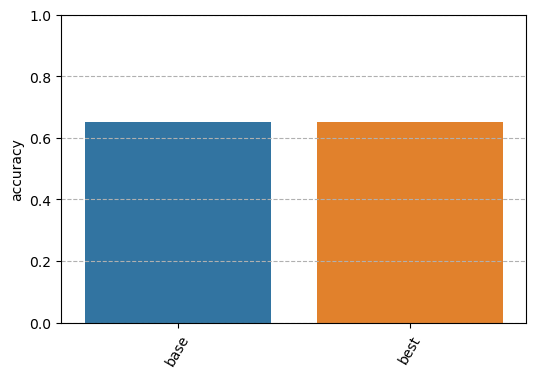

,pipeline,data,accuracy
1,base,test,0.652
2,best,test,0.650


In [46]:
classification_analysis(df_results)

### Base pipeline vs Best pipeline - Classificator performance for train dataset

In [47]:
classificator_performance(pipeline_base, X_train, y_train, labels)

              precision    recall  f1-score   support

      label1       1.00      1.00      1.00       615
      label2       1.00      0.99      1.00       356
      label3       0.99      1.00      0.99       237
      label4       1.00      1.00      1.00       111
      label5       1.00      0.99      0.99        96
      label6       1.00      0.99      1.00       116
      label7       0.99      1.00      0.99       202

   micro avg       1.00      1.00      1.00      1733
   macro avg       1.00      1.00      1.00      1733
weighted avg       1.00      1.00      1.00      1733
 samples avg       0.99      1.00      1.00      1733



In [48]:
classificator_performance(pipeline_best, X_train, y_train, labels)

              precision    recall  f1-score   support

      label1       1.00      1.00      1.00       615
      label2       1.00      0.99      1.00       356
      label3       0.98      1.00      0.99       237
      label4       1.00      1.00      1.00       111
      label5       1.00      0.99      0.99        96
      label6       1.00      1.00      1.00       116
      label7       0.99      1.00      0.99       202

   micro avg       1.00      1.00      1.00      1733
   macro avg       1.00      1.00      1.00      1733
weighted avg       1.00      1.00      1.00      1733
 samples avg       1.00      1.00      1.00      1733



### Base pipeline vs Best pipeline - Classificator performance for test dataset

In [49]:
classificator_performance(pipeline_base, X_test, y_test, labels)

              precision    recall  f1-score   support

      label1       0.92      0.90      0.91       216
      label2       0.74      0.79      0.76       126
      label3       0.73      0.74      0.74        62
      label4       0.58      0.43      0.49        42
      label5       0.50      0.19      0.27        32
      label6       0.52      0.34      0.41        38
      label7       0.75      0.64      0.69        59

   micro avg       0.79      0.72      0.75       575
   macro avg       0.68      0.58      0.61       575
weighted avg       0.77      0.72      0.74       575
 samples avg       0.74      0.74      0.73       575



In [50]:
classificator_performance(pipeline_best, X_test, y_test, labels)

              precision    recall  f1-score   support

      label1       0.92      0.90      0.91       216
      label2       0.78      0.75      0.77       126
      label3       0.80      0.77      0.79        62
      label4       0.62      0.38      0.47        42
      label5       0.54      0.22      0.31        32
      label6       0.63      0.32      0.42        38
      label7       0.76      0.64      0.70        59

   micro avg       0.82      0.71      0.76       575
   macro avg       0.72      0.57      0.62       575
weighted avg       0.80      0.71      0.75       575
 samples avg       0.73      0.74      0.73       575

